# <code style = "color:blue">Predicting Property Valuation using Machine Learning</code>
© Nguyen Le, Zachary Pao, Ashtosh Bhandari

In [1]:
import pandas as pd
df = pd.read_csv('melb_data.csv')
#cleaning data — Remove all rows wit NULL values from the DataFrame
df.dropna()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,Whittlesea,30 Sherwin St,3,h,601000.0,S,Ray,29/07/2017,35.5,3757.0,...,2.0,1.0,972.0,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0
12206,Williamstown,75 Cecil St,3,h,1050000.0,VB,Williams,29/07/2017,6.8,3016.0,...,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0
12207,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,29/07/2017,6.8,3016.0,...,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0
12209,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,...,1.0,1.0,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0


In [2]:
from sklearn.model_selection import train_test_split
#cleaning data — remove all rows with following label names
df2 = df.drop(['Suburb','Address', 'Type', 'SellerG', 'Method', 'Date', 'Postcode', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname', 'Propertycount', 'Longtitude', 'Lattitude', 'Distance'], axis=1)
#cleaning data — Remove all rows with NULL values from the DataFrame
df3 = df2.dropna()

#independent variable - num. of rooms, landsize, car, num. of bathrooms, num. of bedrooms
#using these variables to find a price
#our result will be compared to arbitrary price (as of now 1100000)

#loc property lets us look up values by index and column
X = df3.loc[:, df3.columns != 'Price']
Y = df3['Price'] > 1100000

#splitting the data into training and testing data
data_train, data_test, label_train, label_test = train_test_split(X, Y, test_size=0.2, random_state = 45)

# Longitude and Lattitude was dropped bcuz if it was there, the decision in every node 
# is based on these two variables, and doesn't consider other factors 
df3
Y

0         True
1        False
2         True
3        False
4         True
         ...  
13575     True
13576    False
13577     True
13578     True
13579     True
Name: Price, Length: 13518, dtype: bool

In [3]:
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

y_var = 'Price'
scatter_df = df.drop(y_var, axis = 1)
i = df3.columns
'''
col
0 - rooms
1 - price (DONT USE)
2 - Bedroom
3 - Bathroom
4 - Car
5 - Landsize 
'''

'\ncol\n0 - rooms\n1 - price (DONT USE)\n2 - Bedroom\n3 - Bathroom\n4 - Car\n5 - Landsize \n'

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


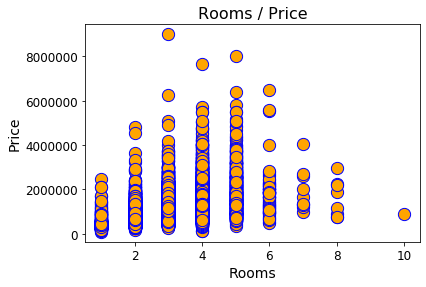

In [4]:
#rooms in relation price
plot1 = sns.scatterplot(i[0], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
plt.title('{} / Price'.format(i[0]), fontsize = 16)
plt.xlabel('{}'.format(i[0]), fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()    

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


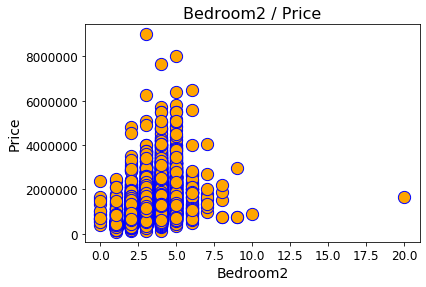

In [5]:
#bedroom in relation to price
plot1 = sns.scatterplot(i[2], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
plt.title('{} / Price'.format(i[2]), fontsize = 16)
plt.xlabel('{}'.format(i[2]), fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


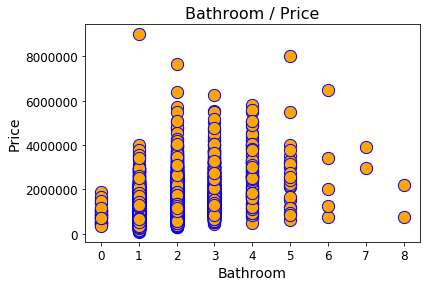

In [6]:
#bathroom in relation to price
plot1 = sns.scatterplot(i[3], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
plt.title('{} / Price'.format(i[3]), fontsize = 16)
plt.xlabel('{}'.format(i[3]), fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


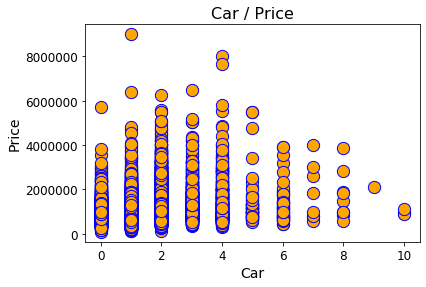

In [7]:
#garage size in relation to price
plot1 = sns.scatterplot(i[4], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
plt.title('{} / Price'.format(i[4]), fontsize = 16)
plt.xlabel('{}'.format(i[4]), fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


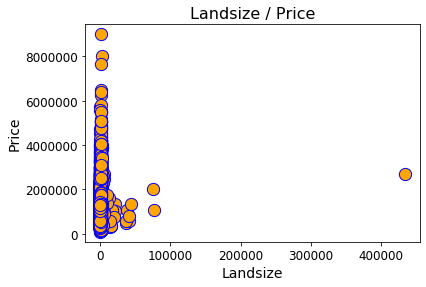

In [8]:
#landsize in relation to price
plot1 = sns.scatterplot(i[5], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
plt.title('{} / Price'.format(i[5]), fontsize = 16)
plt.xlabel('{}'.format(i[5]), fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [9]:
#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
import pandas as np
for i in range(10):
  result = KNeighborsClassifier(n_neighbors=i+1).fit(X, Y)
  print(result.score(data_test, label_test))

0.8816568047337278
0.790680473372781
0.8076923076923077
0.7696005917159763
0.7732988165680473
0.7518491124260355
0.7577662721893491
0.7455621301775148
0.7466715976331361
0.7344674556213018


In [10]:
#cross-validation score for KNN
from sklearn.model_selection import cross_val_score

print(max(cross_val_score(result, data_train, label_train)))

0.6823855755894591


In [11]:
#decision tree + cross-validation score for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dtree = DecisionTreeClassifier(criterion="entropy", random_state=0)
dtree.fit(data_train, label_train)
dtree.score(data_test, label_test)

0.6693786982248521

[Text(1116.0, 489.24, 'Rooms <= 2.5\nentropy = 0.946\nsamples = 10814\nvalue = [6882, 3932]\nclass = 0'),
 Text(558.0, 380.52000000000004, 'Landsize <= 97.5\nentropy = 0.536\nsamples = 3465\nvalue = [3041, 424]\nclass = 0'),
 Text(279.0, 271.8, 'Bathroom <= 1.5\nentropy = 0.204\nsamples = 1472\nvalue = [1425, 47]\nclass = 0'),
 Text(139.5, 163.08000000000004, 'Car <= 1.5\nentropy = 0.106\nsamples = 1284\nvalue = [1266, 18]\nclass = 0'),
 Text(69.75, 54.360000000000014, '\n  (...)  \n'),
 Text(209.25, 54.360000000000014, '\n  (...)  \n'),
 Text(418.5, 163.08000000000004, 'Car <= 1.5\nentropy = 0.62\nsamples = 188\nvalue = [159, 29]\nclass = 0'),
 Text(348.75, 54.360000000000014, '\n  (...)  \n'),
 Text(488.25, 54.360000000000014, '\n  (...)  \n'),
 Text(837.0, 271.8, 'Car <= 0.5\nentropy = 0.7\nsamples = 1993\nvalue = [1616, 377]\nclass = 0'),
 Text(697.5, 163.08000000000004, 'Landsize <= 415.5\nentropy = 0.94\nsamples = 297\nvalue = [191, 106]\nclass = 0'),
 Text(627.75, 54.36000000000

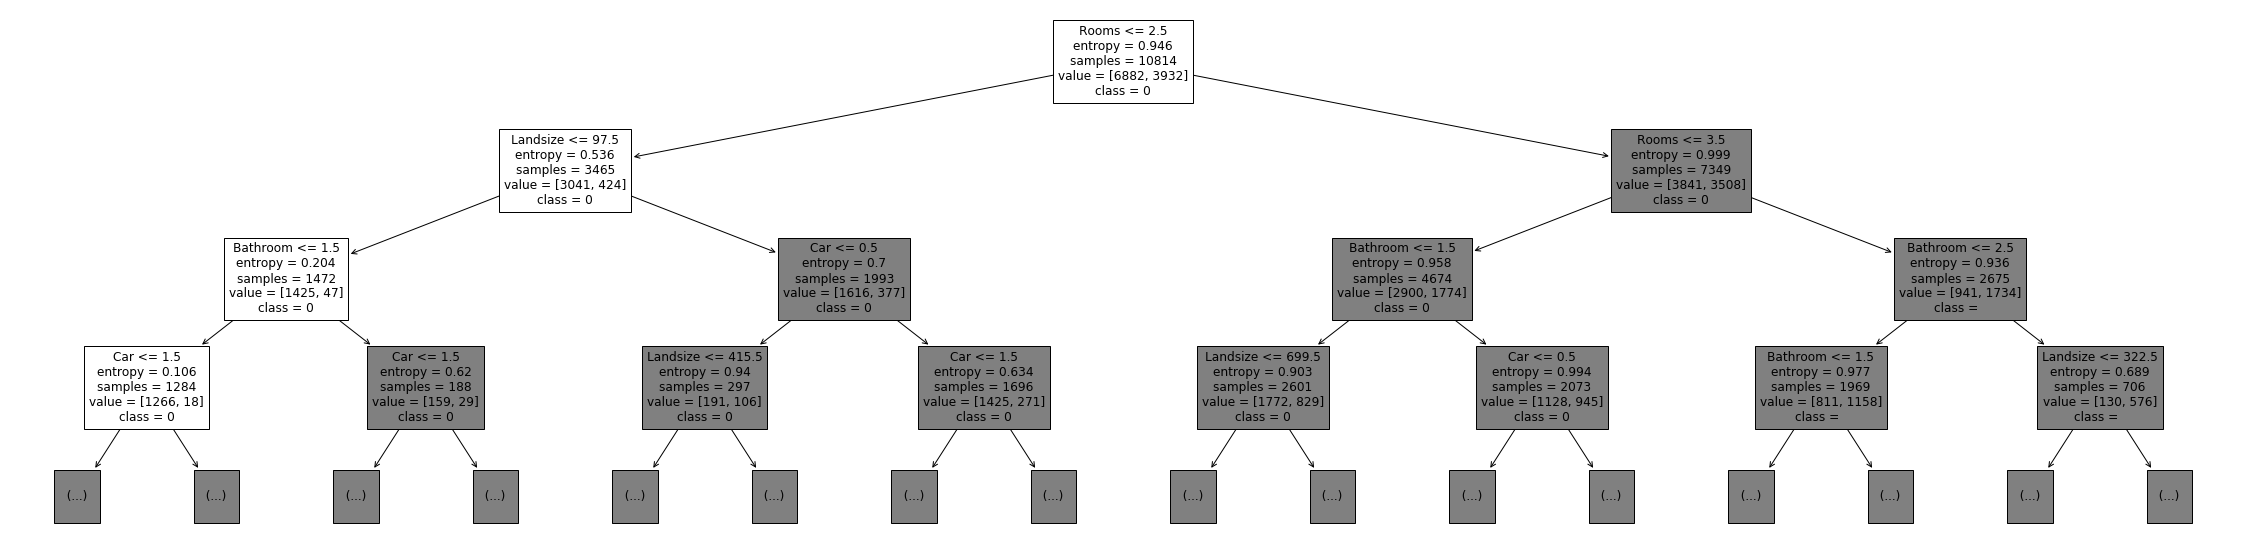

In [12]:
#plotting the tree
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(40,10))
tree.plot_tree(dtree, feature_names = X.columns, class_names = str(Y), max_depth = 3)